#**HAND WRITEN DIGIT RECOGNITION**
USING KERAS TO APPLY BASIC ANN IN THE DATASET.

In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1.mat to 1.mat


In [0]:
data= loadmat('1.mat')

In [4]:
x=data["X"]
y=data["y"]
print(x.shape,y.shape)

(5000, 400) (5000, 1)


Encoding categorical features as a one-hot numeric array. This allows the representation of categorical data to be more expressive.

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y=ohe.fit_transform(y).toarray()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [7]:
x_train.shape

(3750, 400)

In [8]:
x_test.shape

(1250, 400)

VISUALISING THE DATASET

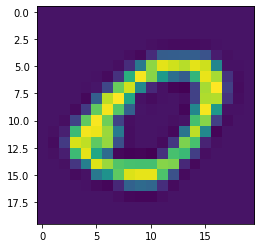

In [9]:
img1=x[0].reshape((20,20))
fig = plt.figure()
plt.imshow(img1)

In [10]:
import keras
x_train=x_train.reshape(3750,400)
x_test=x_test.reshape(1250,400)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y=pd.DataFrame(y).replace(to_replace=[10],value=[0])

print("x_train shape : ",x_train.shape)
print("number of images in x_test : ",x_test.shape[0])
print("number of images in x_train : ",x_train.shape[0])

Using TensorFlow backend.


x_train shape :  (3750, 400)
number of images in x_test :  1250
number of images in x_train :  3750


# BUILDING NEURAL NETWORK MODEL

We have 400 units in input layer. 2 hidden layers with 500 and 400 units each. The output layer has 10 units since we have 10 classes(digits from 0 to 9)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(500,activation='relu',input_dim=400))
model.add(Dense(400,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 3750 samples, validate on 1250 samples
Epoch 1/20
3750/3750 [==============================] - 0s 84us/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.4528 - val_accuracy: 0.9248
Epoch 2/20
3750/3750 [==============================] - 0s 79us/step - loss: 0.0081 - accuracy: 0.9997 - val_loss: 0.4530 - val_accuracy: 0.9288
Epoch 3/20
3750/3750 [==============================] - 0s 82us/step - loss: 0.0071 - accuracy: 0.9997 - val_loss: 0.4583 - val_accuracy: 0.9264
Epoch 4/20
3750/3750 [==============================] - 0s 80us/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 0.4527 - val_accuracy: 0.9272
Epoch 5/20
3750/3750 [==============================] - 0s 81us/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.4553 - val_accuracy: 0.9264
Epoch 6/20
3750/3750 [==============================] - 0s 80us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.4544 - val_accuracy: 0.9248
Epoch 7/20
3750/3750 [==============================] - 0s 83us/step - loss: 0.006

In [37]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss : ",score[0])
print("Test accuracy : ",score[1])

1250/1250 [==============================] - 0s 61us/step
test loss :  0.4687320869237184
Test accuracy :  0.925599992275238


#**TRAIN DATA ACCURACY = 100% 

#TEST DATA ACCURACY = 92.55% **

In [43]:
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)[:5]
label=np.argmax(y_test,axis=1)[:5]
print(pred.argmax())
print(pred)
print(label)

0
[9 0 8 2 0]
[9 6 8 8 0]


In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               200500    
_________________________________________________________________
dense_17 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                4010      
Total params: 404,910
Trainable params: 404,910
Non-trainable params: 0
_________________________________________________________________
